# TOP CUSTOMERS ANALYSIS 5%

In [2]:
top_cust_bet = read.csv('D:/R/TopCustomers/topCustomersBet.csv')
top_cust_info = read.csv('D:/R/TopCustomers/topCustomersInfo.csv')

## Get the age

In [3]:
str(top_cust_info)

'data.frame':	1190 obs. of  3 variables:
 $ accountno    : int  100213 100821 101278 101412 101801 100341 100961 101564 101590 101874 ...
 $ c.dateofbirth: Factor w/ 1131 levels "1944-11-23 00:00:00.0",..: 55 81 120 415 352 357 145 225 84 228 ...
 $ c.gender     : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...


In [4]:
head(top_cust_info)

accountno,c.dateofbirth,c.gender
100213,1960-11-08 00:00:00.0,M
100821,1962-04-03 00:00:00.0,M
101278,1964-05-12 00:00:00.0,M
101412,1974-11-07 00:00:00.0,M
101801,1972-10-05 00:00:00.0,M
100341,1972-11-29 00:00:00.0,M


In [5]:
top_cust_info$year = format(as.Date(top_cust_info$c.dateofbirth, format = '%Y-%m-%d'),'%Y')

In [6]:
head(top_cust_info)

accountno,c.dateofbirth,c.gender,year
100213,1960-11-08 00:00:00.0,M,1960
100821,1962-04-03 00:00:00.0,M,1962
101278,1964-05-12 00:00:00.0,M,1964
101412,1974-11-07 00:00:00.0,M,1974
101801,1972-10-05 00:00:00.0,M,1972
100341,1972-11-29 00:00:00.0,M,1972


In [7]:
top_cust_info$age = 2018 - as.numeric(top_cust_info$year)

## Plots

### get the distribution first

In [10]:
library(ggplot2)

In [11]:
summary(top_cust_info$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23.0    34.0    40.0    41.2    47.0    74.0 

In [12]:
table(top_cust_info$age)


23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 
 2  9 12 11 16 27 28 43 24 33 49 48 59 60 54 50 45 44 49 35 47 38 29 52 33 35 
49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 68 73 74 
30 33 27 17 18 15 23 21 17 11  7  5  4  4  5  7  4  5  3  1  1 

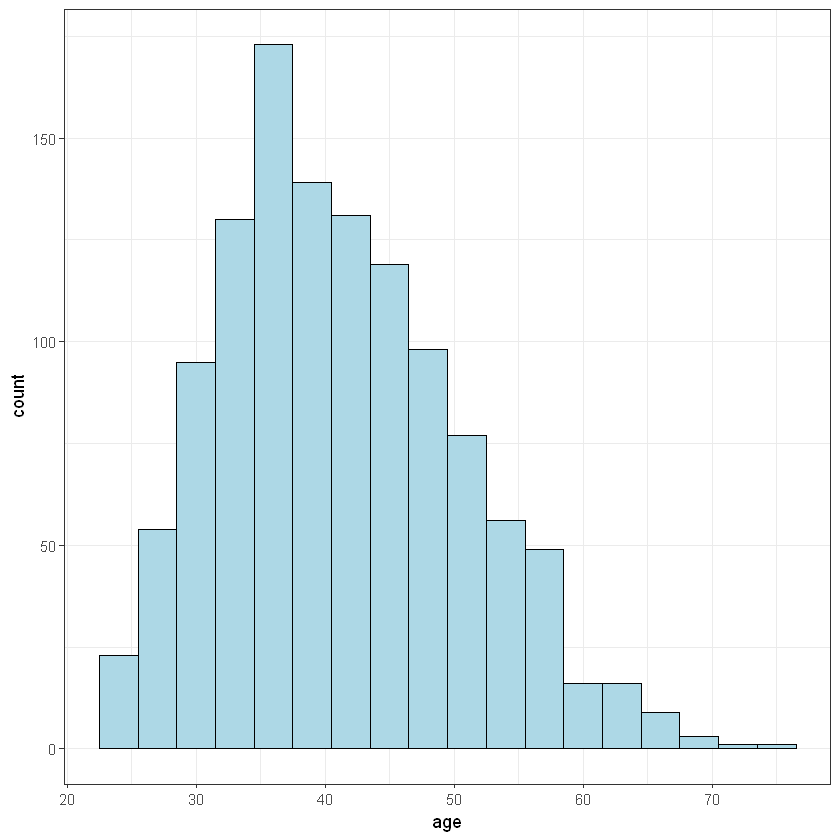

In [13]:
ggplot(top_cust_info, aes(age)) +
  geom_histogram(fill = 'lightblue', color = 'black', binwidth = 3) +
  theme_bw()

In [14]:
table(top_cust_info$c.gender)


   F    M 
  47 1143 

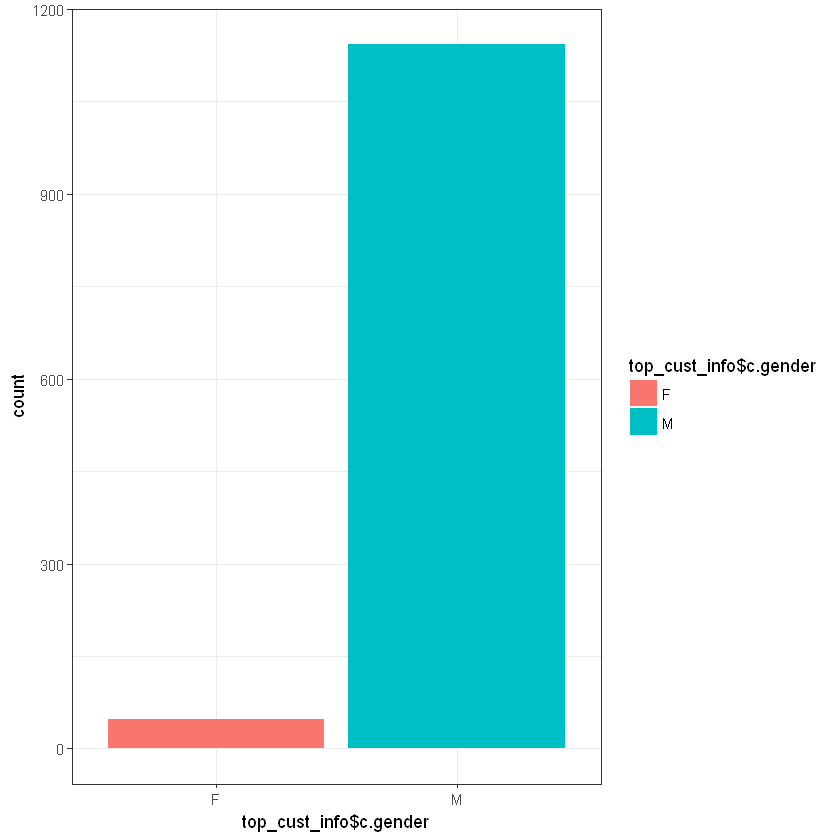

In [15]:
ggplot(top_cust_info, aes(top_cust_info$c.gender)) +
  geom_bar(aes(fill = top_cust_info$c.gender)) +
  theme_bw()

## Let's check their betting behaviour

In [16]:
head(top_cust_bet)

a.accountno,bet_type,a.oddsselected,time,a.betamount
10584614,Team to Score 1st Goal,2.50,04/12/2016,300
10486770,Team to Score 2nd Goal,2.70,05/12/2016,204
123780,Team to Score 2nd Goal,3.50,05/12/2016,500
10495617,Team to Score 2nd Goal,4.10,05/12/2016,30
10486926,Total Goals Odd/Even,1.37,05/12/2016,20
9865986,Team to Score 2nd Goal,2.90,05/12/2016,100


### the correlation of their odds and bet amount

In [17]:
cor(top_cust_bet$a.oddsselected, log(top_cust_bet$a.betamount))

[1] -0.2836847

### get their average selected odds and average bet amount

In [18]:
library(dplyr)

avg_bet = top_cust_bet %>% group_by(a.accountno) %>% summarise(avg_odds = mean(a.oddsselected),
                                                               avg_amount = mean(a.betamount))


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [19]:
head(avg_bet)

a.accountno,avg_odds,avg_amount
100122,2.125915,489.19615
100171,5.013077,1849.69231
100183,13.842246,78.66782
100195,2.513343,188.91385
100213,2.752117,126.63159
100341,2.953558,210.51450


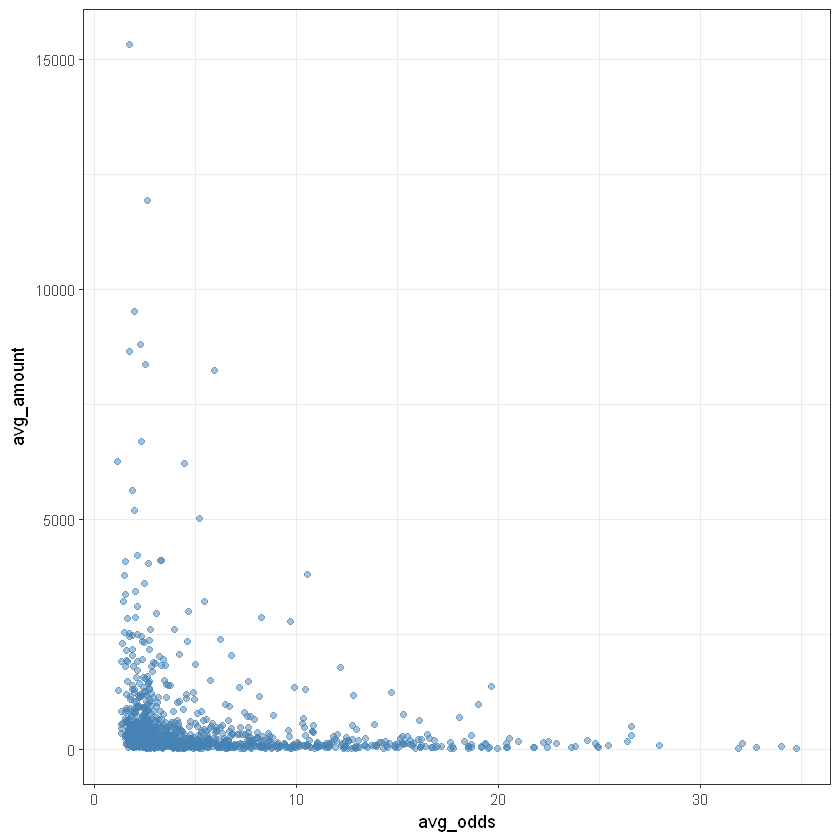

In [20]:
ggplot(avg_bet, aes(avg_odds, avg_amount)) +
  geom_point(color = 'steelblue', alpha = .5) +
  theme_bw()

### similar to the trend previous perceived

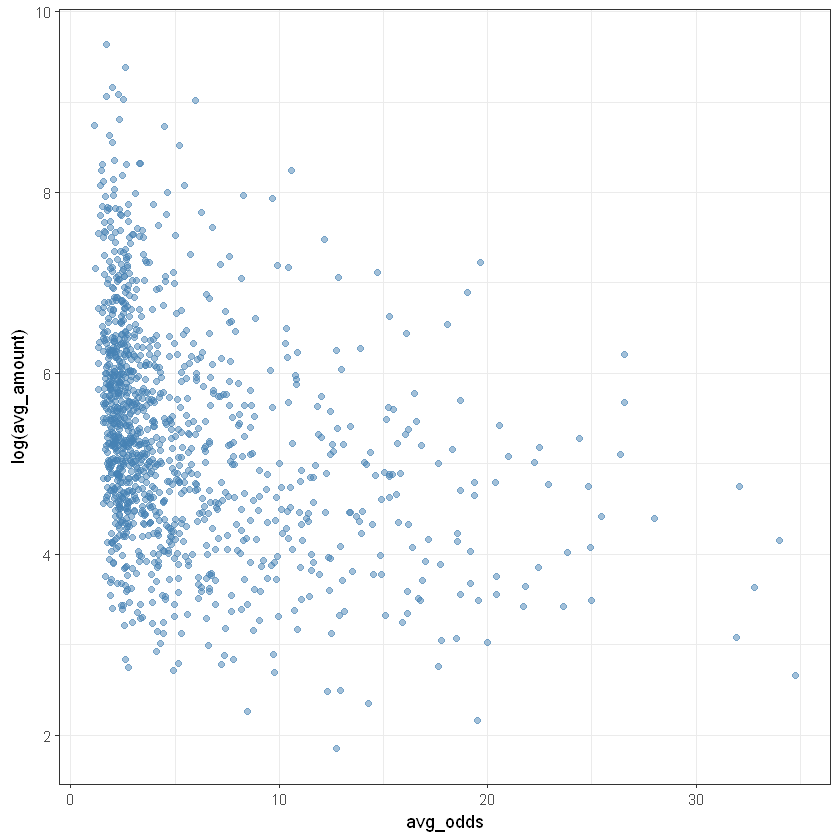

In [21]:
ggplot(avg_bet, aes(avg_odds, log(avg_amount))) +
  geom_point(color = 'steelblue', alpha = .5) +
  theme_bw()

## Detect the trend

In [23]:
top_cust_bet$time2 = as.Date(top_cust_bet$time, format = '%d/%m/%Y')

total_bet_day = top_cust_bet %>% group_by(a.accountno, time2) %>% summarise(total_bet = sum(a.betamount),
                                                                           avg_odds = mean(a.oddsselected))

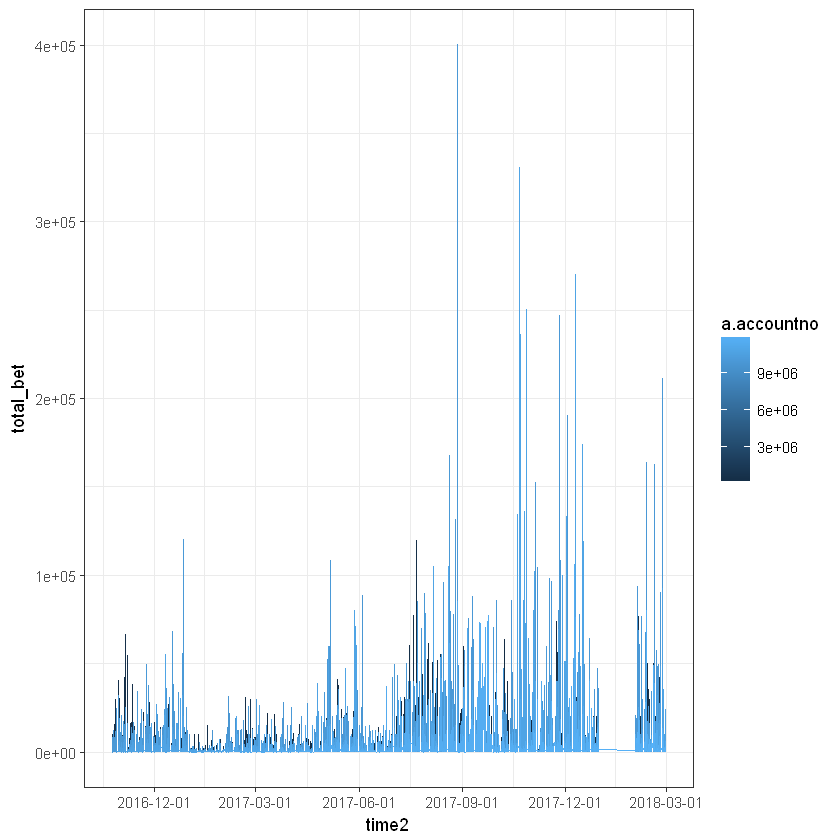

In [28]:
ggplot(total_bet_day, aes(time2, total_bet)) +
  geom_line(aes(color = a.accountno)) +
  scale_x_date(date_breaks = '3 month') +
  theme_bw()

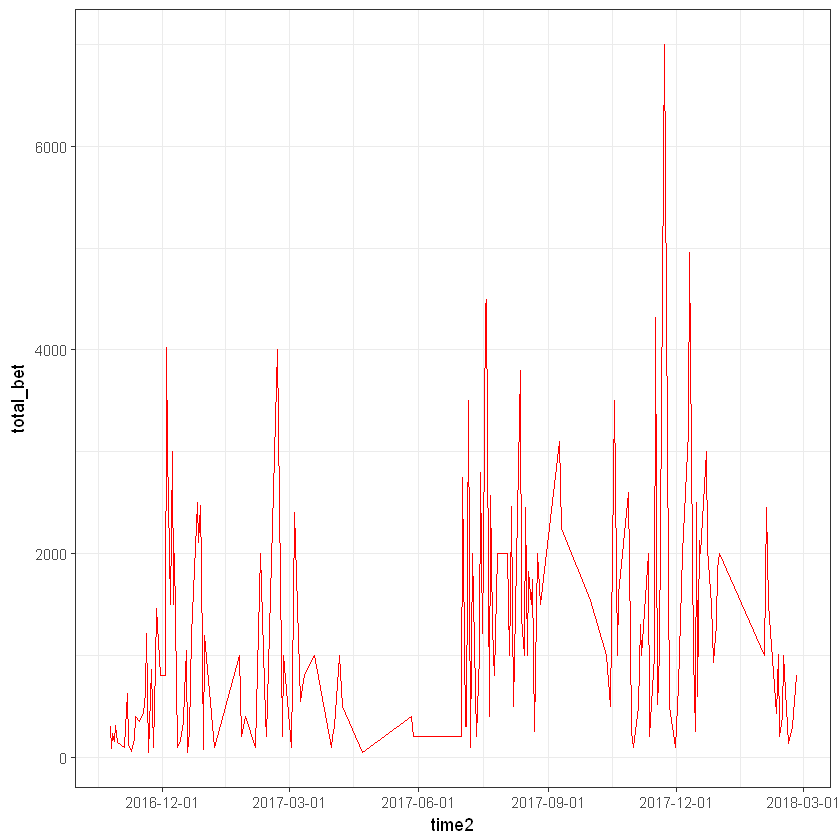

In [27]:
ggplot(subset(total_bet_day, a.accountno == 100122), aes(time2, total_bet)) +
  geom_line(color = 'red') +
  scale_x_date(date_breaks = '3 month') +
  theme_bw()
# one customer's betting behaviour

## customers with their wining flag

In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
top_cust_bet = read.csv('D:/R/TopCustomers/topCustomer_latest.csv')
top_cust_bet$time = as.Date(top_cust_bet$time, format = '%d/%m/%Y')

In [3]:
head(top_cust_bet)

a.accountno,bet_type,a.oddsselected,time,a.betamount,a.validationamount
10584614,Team to Score 1st Goal,2.50,2016-12-04,300,0
10486770,Team to Score 2nd Goal,2.70,2016-12-05,204,0
123780,Team to Score 2nd Goal,3.50,2016-12-05,500,1750
10495617,Team to Score 2nd Goal,4.10,2016-12-05,30,0
10486926,Total Goals Odd/Even,1.37,2016-12-05,20,0
9865986,Team to Score 2nd Goal,2.90,2016-12-05,100,0


### bet against win

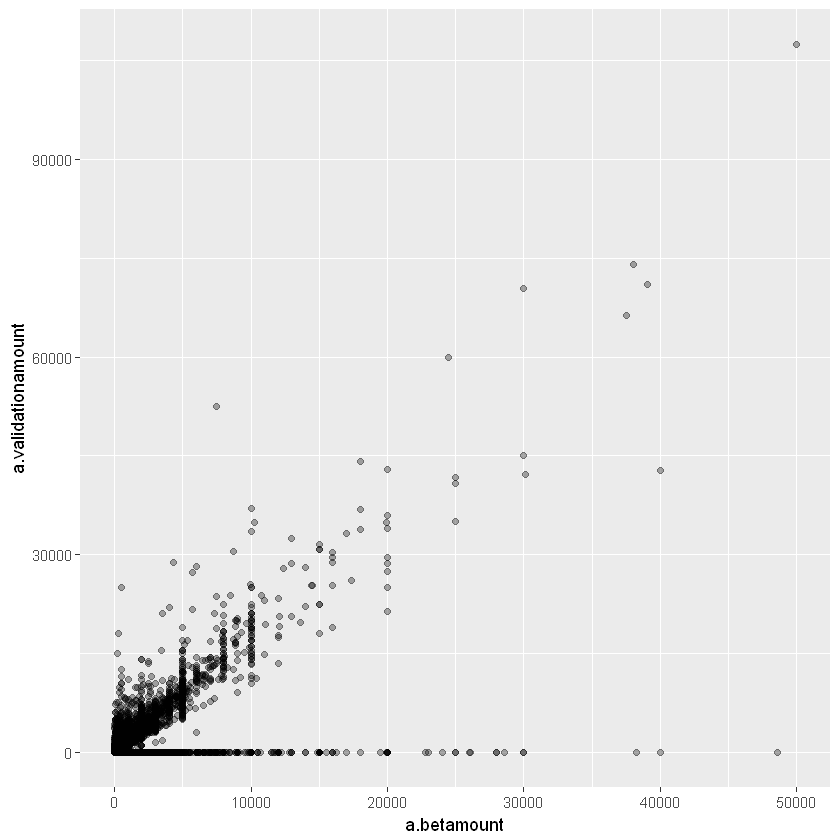

In [5]:
ggplot(top_cust_bet[sample(nrow(top_cust_bet), 200000), ], aes(a.betamount, a.validationamount)) +
  geom_point(alpha = 1/3)

### how much they bet and how much they win each day per customer

In [4]:
cust_payout = top_cust_bet %>% group_by(a.accountno, time) %>% summarise(stake_day = sum(a.betamount),
                                                                         payout_day = sum(a.validationamount))
head(cust_payout)

a.accountno,time,stake_day,payout_day
100122,2016-10-25,300.0,190.00
100122,2016-10-26,87.5,87.88
100122,2016-10-27,235.0,322.50
100122,2016-10-28,150.0,322.50
100122,2016-10-29,311.5,137.50
100122,2016-10-30,147.0,261.30


### check the correlation

In [6]:
cor(cust_payout$stake_day, cust_payout$payout_day)

[1] 0.8541507

### payout ratio

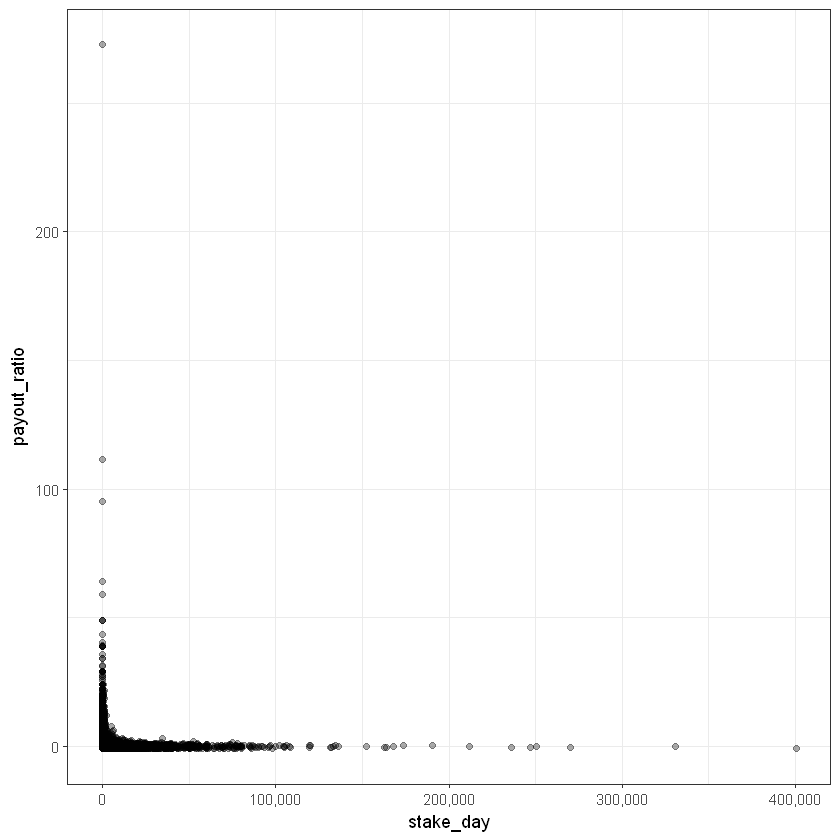

In [16]:
cust_payout$payout_ratio = (cust_payout$payout_day - cust_payout$stake_day)/cust_payout$stake_day

ggplot(cust_payout, aes(stake_day, payout_ratio)) +
  geom_point(alpha = 1/3) +
  scale_x_continuous(labels = scales::comma) +
  theme_bw()

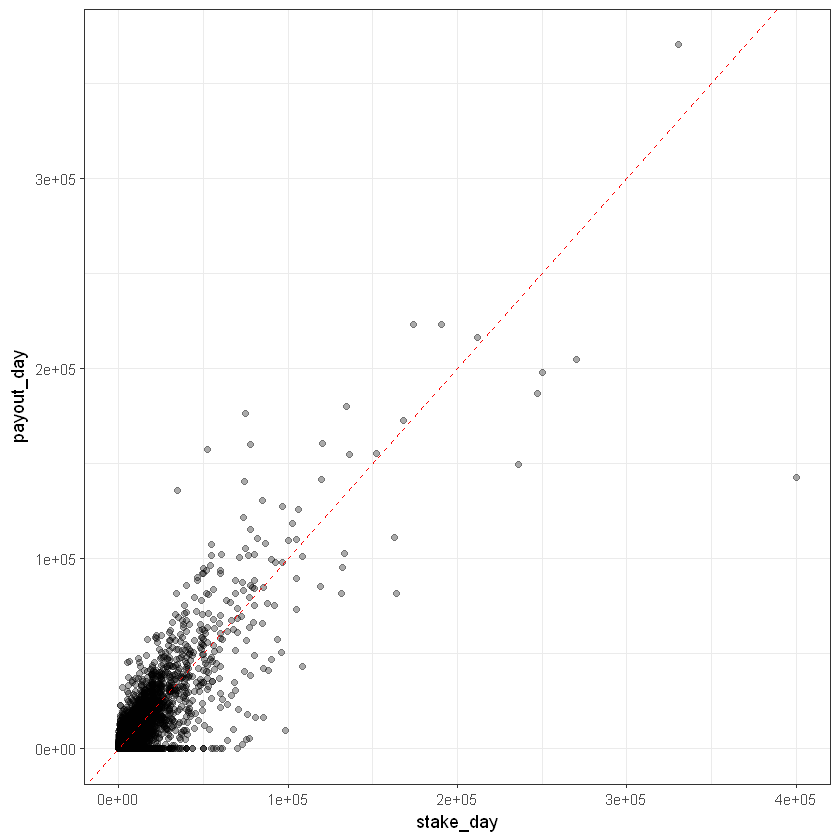

In [17]:
ggplot(cust_payout, aes(stake_day, payout_day)) +
  geom_point(alpha = 1/3) +
  theme_bw() +
  geom_abline(intercept = 1, color = 'red', lty = 2) 

## Do they profit through the priod?

In [9]:
total_spent = cust_payout %>% group_by(a.accountno) %>% summarise(spent = sum(stake_day),
                                                                  win = sum(payout_day))

In [10]:
total_spent$profit = total_spent$win - total_spent$spent

In [11]:
head(total_spent, 10)

a.accountno,spent,win,profit
100122,208397.56,203185.50,-5212.06
100171,120230.00,78570.00,-41660.00
100183,68991.68,52839.85,-16151.83
100195,66686.59,61180.30,-5506.29
100213,140561.06,120648.95,-19912.11
100341,159148.96,135981.29,-23167.67
100614,127053.92,113389.36,-13664.56
100651,2649961.02,2606917.19,-43043.83
100730,33667.32,8964.01,-24703.31
100821,45374.00,34647.40,-10726.60


In [12]:
table(total_spent$profit > 0)


FALSE  TRUE 
 1093   107 

In [13]:
library(reshape2)
colnames(total_spent) = c('accountno', 'spent', 'win', 'profit')
total_spent$accountno = factor(total_spent$accountno)
total_spent_melt = melt(total_spent, id.vars = 'accountno')

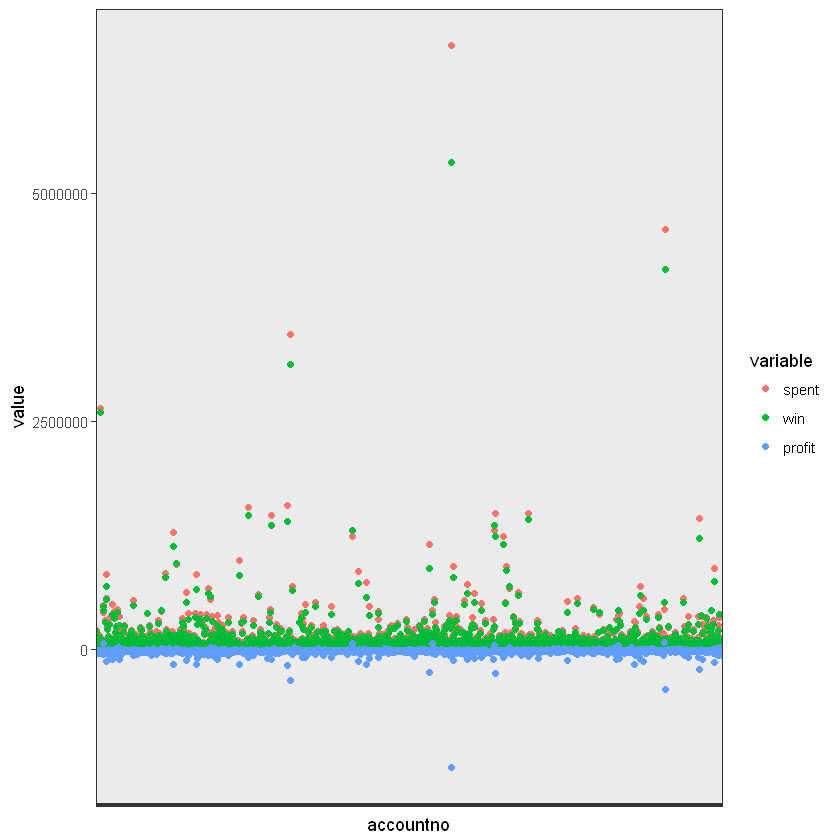

In [14]:
ggplot(total_spent_melt, aes(accountno, value)) +
  geom_point(aes(color = variable)) +
  theme_bw() +
  theme(axis.text.x = element_blank())

## Only around 10% of them profit!!!!!!!!!!!!!

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

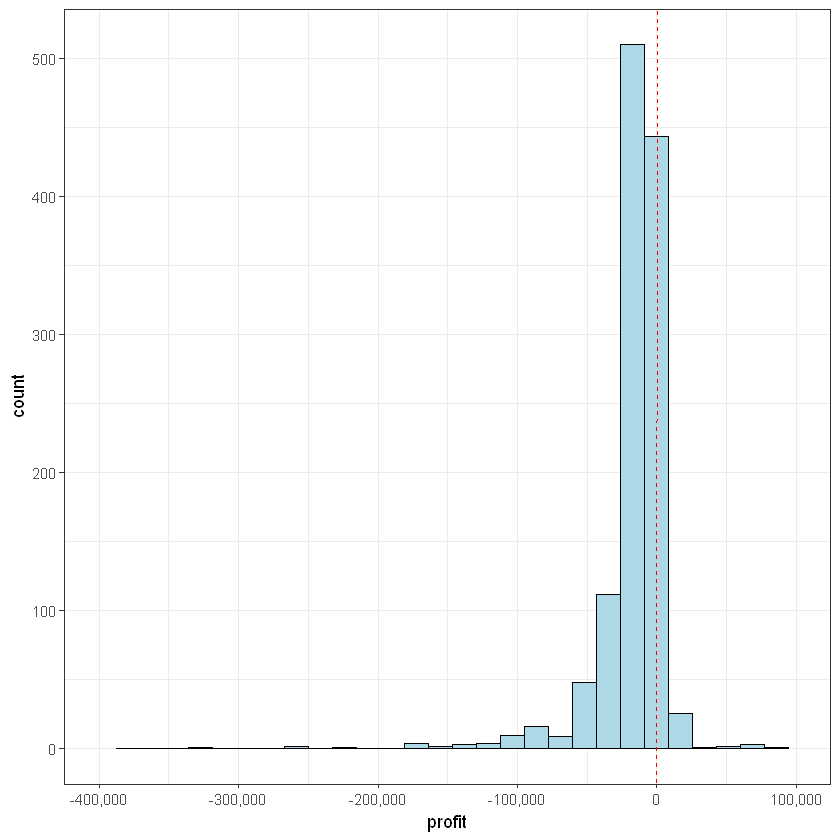

In [15]:
ggplot(total_spent, aes(profit)) +
  geom_histogram(fill = 'lightblue', color = 'black') +
  scale_x_continuous(labels = scales::comma, limits = c(-400000, 100000)) +
  theme_bw() +
  geom_abline(intercept = 0, color = 'red', lty = 2)

### How does last day win affect today's betting?

In [6]:
# test on one customer first
cust_payout$profit = cust_payout$payout_day - cust_payout$stake_day

one_cust = subset(cust_payout, a.accountno == 100122)

cor(one_cust$profit[1:164], one_cust$stake_day[2:165])

[1] -0.07654527

## profit affects bet amount?

### check if a customer win today affects the bet amount the next day ?

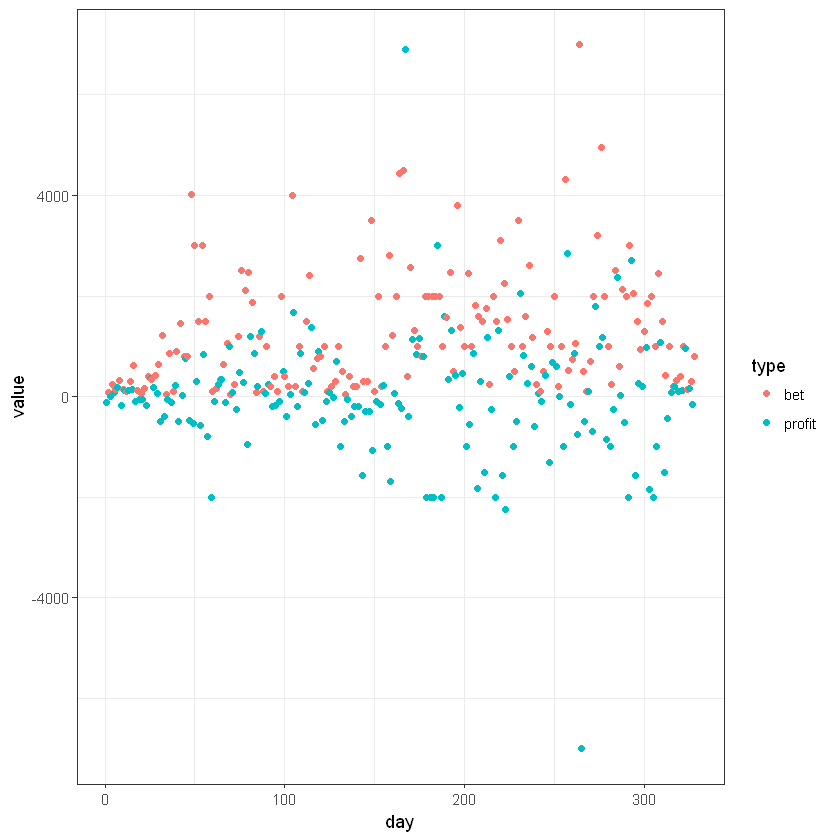

In [22]:
# profit -> bet amount
profit = one_cust$profit[1:164]
amount = one_cust$stake_day[2:165]

sq = c()
for(i in 1:length(profit)){
  sq = c(sq, profit[i], amount[i])
}

bet_seq = data.frame(day = 1:(2*length(profit)), value = sq, type = rep(c('profit', 'bet'), length(profit)))

ggplot(bet_seq, aes(day, value)) +
  geom_point(aes(color = type)) + theme_bw()
# not strongly correlated